Loading Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
import cv2

Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip '/content/drive/MyDrive/BME548L_Project/custom_data.zip' -d '/content/drive/MyDrive/BME548L_Project/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/BME548L_Project/custom_data/pinca442.jpg  
  inflating: /content/drive/MyDrive/BME548L_Project/__MACOSX/custom_data/._pinca442.jpg  
  inflating: /content/drive/MyDrive/BME548L_Project/custom_data/pinca324.jpg  
  inflating: /content/drive/MyDrive/BME548L_Project/__MACOSX/custom_data/._pinca324.jpg  
  inflating: /content/drive/MyDrive/BME548L_Project/custom_data/bisturi548.jpg  
  inflating: /content/drive/MyDrive/BME548L_Project/__MACOSX/custom_data/._bisturi548.jpg  
  inflating: /content/drive/MyDrive/BME548L_Project/custom_data/bisturi674.txt  
  inflating: /content/drive/MyDrive/BME548L_Project/__MACOSX/custom_data/._bisturi674.txt  
  inflating: /content/drive/MyDrive/BME548L_Project/custom_data/bisturi660.txt  
  inflating: /content/drive/MyDrive/BME548L_Project/__MACOSX/custom_data/._bisturi660.txt  
  inflating: /content/drive/MyDrive/BME548L_Project/custom_data/pinca330.jpg  
  inflating: 

In [ ]:
sample = cv2.imread("/content/drive/MyDrive/BME548L_Project/custom_data/bisturi1.jpg")

sample.shape

(480, 640, 3)

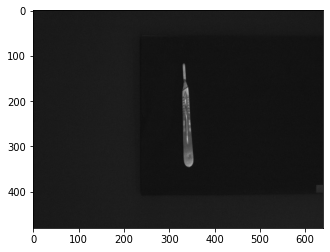

In [ ]:
plt.imshow(sample)

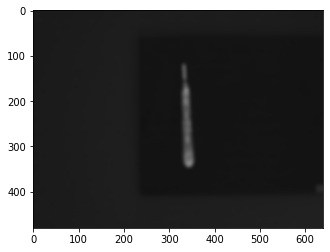

In [ ]:
blur_sample = cv2.GaussianBlur(sample,(17,17),cv2.BORDER_DEFAULT)
plt.imshow(blur_sample)

In [ ]:
with open('/content/drive/MyDrive/BME548L_Project/custom_data/bisturi1.txt') as s:
  sample_bound = s.read()
  catG, xval, yval, wdt, hgt = map(float,sample_bound.split())
  

In [ ]:
h = int((hgt*480))
w = int((wdt*640))
x = int((xval*640)-(w/2))
y = int((yval*480)-(h/2))

print(x)
print(y)
print(w)
print(h)

322
115
35
228


In [ ]:
cv2.rectangle(sample, (x, y), (x+w, y+h), (255,0,0), 2)

array([[[27, 27, 27],
        [26, 26, 26],
        [25, 25, 25],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [26, 26, 26]],

       [[26, 26, 26],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [24, 24, 24]],

       [[25, 25, 25],
        [25, 25, 25],
        [25, 25, 25],
        ...,
        [28, 28, 28],
        [27, 27, 27],
        [24, 24, 24]],

       ...,

       [[25, 25, 25],
        [26, 26, 26],
        [27, 27, 27],
        ...,
        [34, 34, 34],
        [32, 32, 32],
        [31, 31, 31]],

       [[26, 26, 26],
        [27, 27, 27],
        [28, 28, 28],
        ...,
        [33, 33, 33],
        [33, 33, 33],
        [32, 32, 32]],

       [[26, 26, 26],
        [27, 27, 27],
        [27, 27, 27],
        ...,
        [32, 32, 32],
        [34, 34, 34],
        [33, 33, 33]]], dtype=uint8)

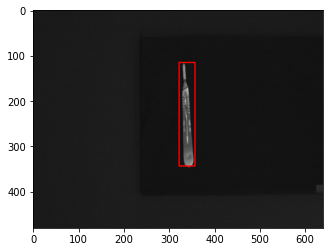

In [ ]:
plt.imshow(sample)

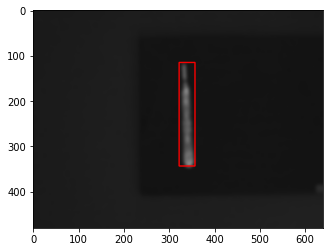

In [ ]:
cv2.rectangle(blur_sample, (x, y), (x+w, y+h), (255,0,0), 2)
plt.imshow(blur_sample)

Making a blurred image dataset

In [ ]:
directory = "/content/drive/MyDrive/BME548L_Project/custom_data"
new_path = "/content/drive/MyDrive/BME548L_Project/custom_data_blur"
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        im = cv2.imread(directory+'/'+filename)
        blur_im = cv2.GaussianBlur(im,(17,17),cv2.BORDER_DEFAULT)
        im1 = Image.fromarray(blur_im)
        new = os.path.join(new_path, filename)
        im1.save(new)
        continue
    elif filename.endswith(".txt"):   
        text_file = open(directory+'/'+filename, 'r')
        s = text_file.read()
        out = open(new_path+'/'+filename, 'w')
        out.write(s)
        out.close()
        continue
    else:
        continue

YOLOv3 model

In [ ]:
#YOLOv3 model
#Loading darknet
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/BME548L_Project/darknet'

Cloning into '/content/drive/MyDrive/BME548L_Project/darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.05 MiB | 5.70 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
!ls '/content/drive/MyDrive/BME548L_Project/darknet'

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
%cd '/content/drive/MyDrive/BME548L_Project/darknet'

/content/drive/MyDrive/BME548L_Project/darknet


In [ ]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

In [ ]:
!darknet/darknet

/bin/bash: darknet/darknet: Not a directory


In [ ]:
%cd '/content/drive/MyDrive/BME548L_Project'

/content/drive/MyDrive/BME548L_Project


In [ ]:
!python custom_data/creating-files-data-and-name.py

In [ ]:
!python custom_data/creating-train-and-test-txt-files.py

In [ ]:
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov3_custom_med.cfg custom_weight/darknet53.conv.74 -dont_show #Training weights

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000277, iou_loss = 0.000000, total_loss = 0.000277 
 total_bbox = 45824, rewritten_bbox = 0.857629 % 
]2;526/600: loss=1.1 hours left=0.8
 526: 1.148957, 1.262992 avg loss, 0.000077 rate, 27.903744 seconds, 33664 images, 0.793478 hours left
Loaded: 0.000059 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.533465), count: 5, class_loss = 2.174904, iou_loss = 1.405480, total_loss = 3.580384 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.001026, iou_loss = 0.000000, total_loss = 0.001026 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000294, iou_loss = 0.000000, total_loss = 0.000294 
 total_bbox = 45829, rewritten_bbox = 0.857536 % 
v3 (mse l

In [ ]:
!python custom_data_blur/creating-files-data-and-name.py

In [ ]:
!python custom_data_blur/creating-train-and-test-txt-files.py

In [ ]:
!darknet/darknet detector train custom_data_blur/labelled_data.data darknet/cfg/yolov3_custom_med.cfg custom_weight/darknet53.conv.74 -dont_show #Training weights for blurred dataset

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000220, iou_loss = 0.000000, total_loss = 0.000220 
 total_bbox = 45725, rewritten_bbox = 0.739202 % 
]2;526/600: loss=1.2 hours left=0.7
 526: 1.189542, 1.351151 avg loss, 0.000077 rate, 22.186526 seconds, 33664 images, 0.686051 hours left
Loaded: 0.000053 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.578768), count: 4, class_loss = 2.113138, iou_loss = 0.753017, total_loss = 2.866155 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.418056), count: 1, class_loss = 0.482943, iou_loss = 0.332838, total_loss = 0.815781 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000241, iou_loss = 0.000000, total_loss = 0.000241 
 total_bbox = 45730, rewritten_bbox = 0.739121 % 
v3 (mse l